### **Chapter 2: Sampling, Fourier Transform, and Convolution**
#### Ex. 1: Implement down-sampling with anti-aliasing using the Gaussian LPF (hint: reduce the house grayscale image four times, first by applying a Gaussian filterand then by filtering every other row and column. Compare the output images with and without pre-processing with LPF before down-sampling). 
---

#### 1. Import các thư viện cần thiết

In [13]:
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.color import rgb2gray
from skimage.io import imread
from scipy.signal.windows import gaussian
import scipy.fftpack as fp
import numpy as np

#### 2. Đọc ảnh và tạo bộ lọc Gaussian

In [16]:
im = rgb2gray(imread('lena.jpg'))
kernel = np.outer(gaussian(im.shape[0], 1), gaussian(im.shape[1], 1))

#### 3. Thực hiện phép biến đổi Fourier và làm mờ ảnh

In [18]:
freq = fp.fft2(im)
assert(freq.shape == kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved = freq*freq_kernel  # by the Convolution theorem
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur)

#### 4. Vẽ các kết quả

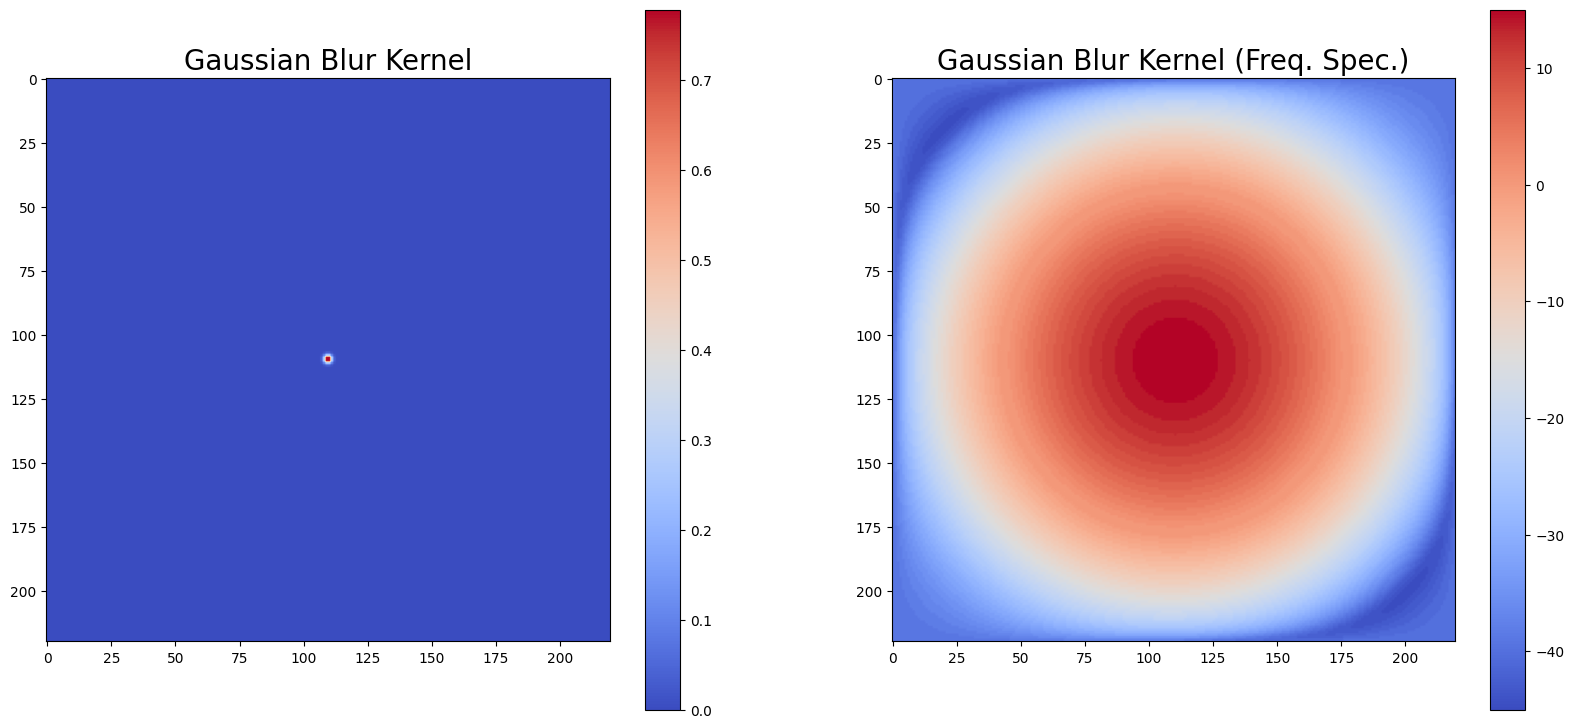

In [40]:
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.imshow(kernel, cmap='coolwarm')
plt.colorbar()
plt.title('Gaussian Blur Kernel', size=20)

plt.subplot(222)
plt.imshow( (20*np.log10( 0.01 + fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm')
plt.colorbar()
plt.title('Gaussian Blur Kernel (Freq. Spec.)', size=20)

plt.show()

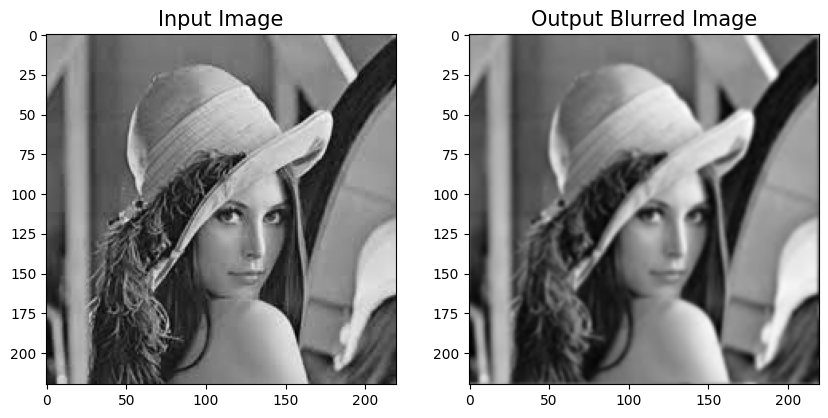

In [41]:
plt.figure(figsize=(10, 10))

plt.subplot(223)
plt.imshow(im, cmap='gray')
plt.title('Input Image', size=15)


plt.subplot(224)
plt.imshow(im_blur, cmap='gray')
plt.title('Output Blurred Image', size=15)

plt.show()

#### 5. Vẽ biểu đồ 3D

##### 5.1 Xây dựng hàm vẽ biểu đồ 3D plot_3d() và tạo figure 3D

In [65]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_3d(X, Y, Z):
    # Vẽ bề mặt 3D.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)  
    ax.zaxis.set_major_locator(LinearLocator(10))  # Đặt số lượng chỉ số cho trục Z
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))  # Định dạng nhãn trục Z
    ax.set_xlabel('F1', size=20)  # Đặt nhãn trục X
    ax.set_ylabel('F2', size=20)  # Đặt nhãn trục Y
    ax.set_zlabel('Freq Response', size=20)  # Đặt nhãn trục Z
    plt.show()  # Hiển thị biểu đồ


- ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False): vẽ bề mặt 3D từ dữ liệu X, Y, và Z với cmap=cm.coolwarm để tô màu bề mặt theo thang màu coolwarm 
    - linewidth=0 và antialiased=False giúp bề mặt trơn tru mà không có đường viền.
- ax.zaxis.set_major_locator(LinearLocator(10)): đặt số lượng chỉ số cho trục Z là 10.
- ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')): dịnh dạng số liệu trên trục Z để hiển thị 2 chữ số thập phân.
- ax.set_xlabel('F1', size=20): dặt nhãn cho trục X với font size là 20.
- ax.set_ylabel('F2', size=20): dặt nhãn cho trục Y với font size là 20.
- ax.set_zlabel('Freq Response', size=20): đặt nhãn cho trục Z với font size là 20.
- plt.show(): Hiển thị biểu đồ sau khi vẽ.

##### 5.2  Biểu đồ hiển thị Tần số của Bộ lọc Gaussian (freq_kernel)

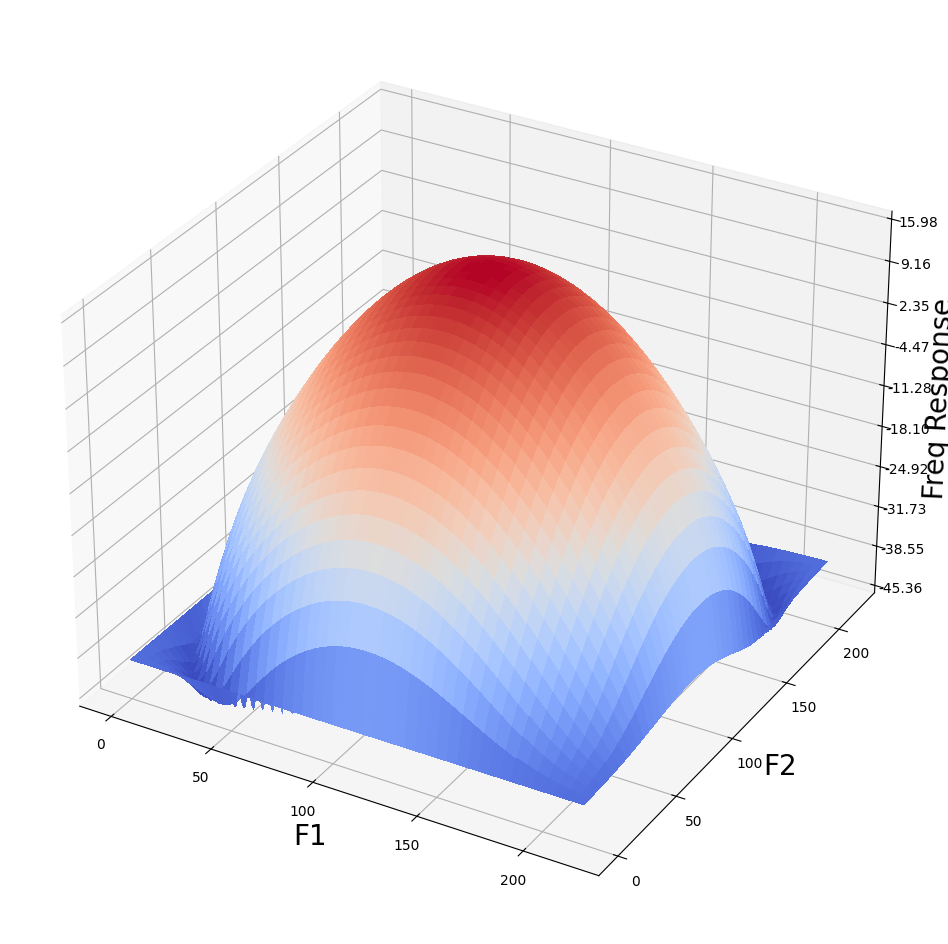

In [ ]:
# Tạo và cấu hình figure 3D
fig = plt.figure(figsize=(12,12))  # Tạo figure
ax = fig.add_subplot(111, projection='3d') # Lấy trục 3D

# Vẽ biểu đồ
Y = np.arange(freq.shape[0]) #-freq.shape[0]//2,freq.shape[0]-freq.shape[0]//2)
X = np.arange(freq.shape[1]) #-freq.shape[1]//2,freq.shape[1]-freq.shape[1]//2)
X, Y = np.meshgrid(X, Y)
Z = (20*np.log10( 0.01 + fp.fftshift(freq_kernel))).real
plot_3d(X,Y,Z)

- Tạo và cấu hình figure 3D:
    - fig = plt.figure(figsize=(12,12)): Tạo một figure có kích thước 12x12 inches để hiển thị các biểu đồ với không gian rộng rãi.
    - ax = fig.add_subplot(111, projection='3d'): Tạo một trục 3D trong figure. 111 chỉ ra rằng đang tạo một lưới subplot 1x1 và chọn subplot đầu tiên (chỉ có một biểu đồ). projection='3d' xác định rằng bạn muốn tạo biểu đồ 3D.
- fig = plt.figure(figsize=(12,12)): Tạo một figure có kích thước 12x12 inches để hiển thị các biểu đồ với không gian rộng rãi.
- ax = fig.add_subplot(111, projection='3d'): Tạo một trục 3D trong figure. 
    - 111 chỉ ra rằng đang tạo một lưới subplot 1x1 và chỉ có duy nhất biểu đồ này.
    - projection='3d' xác định rằng bạn muốn tạo biểu đồ 3D.

##### 5.3 Biểu đồ hiển thị Tần số của Ảnh (freq)

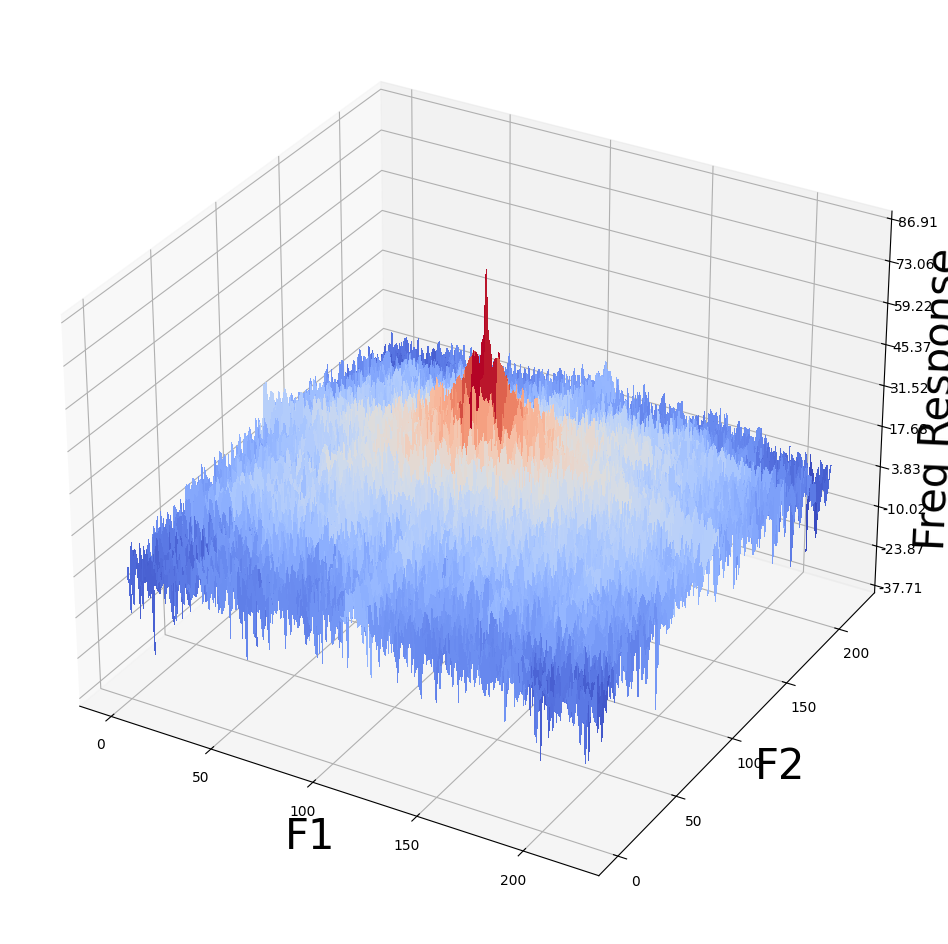

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

Z = (20*np.log10( 0.01 + fp.fftshift(freq))).real
plot_3d(X,Y,Z)

- fp.fftshift(freq_kernel): Dịch chuyển tần số của bộ lọc Gaussian trong không gian Fourier sao cho phần trung tâm của phổ (frequency spectrum) được đặt vào giữa.
    - 20*np.log10(0.01 + ...): Chuyển đổi tần số của bộ lọc Gaussian sang đơn vị decibel (dB) để dễ dàng quan sát. Thêm 0.01 để tránh giá trị logarit không xác định khi giá trị quá nhỏ.
    - .real: Lấy phần thực của kết quả sau phép biến đổi (sau khi biến đổi tần số).

##### 5.4 Biểu đồ hiển thị Tần số của Kết quả Tích chập (convolved)

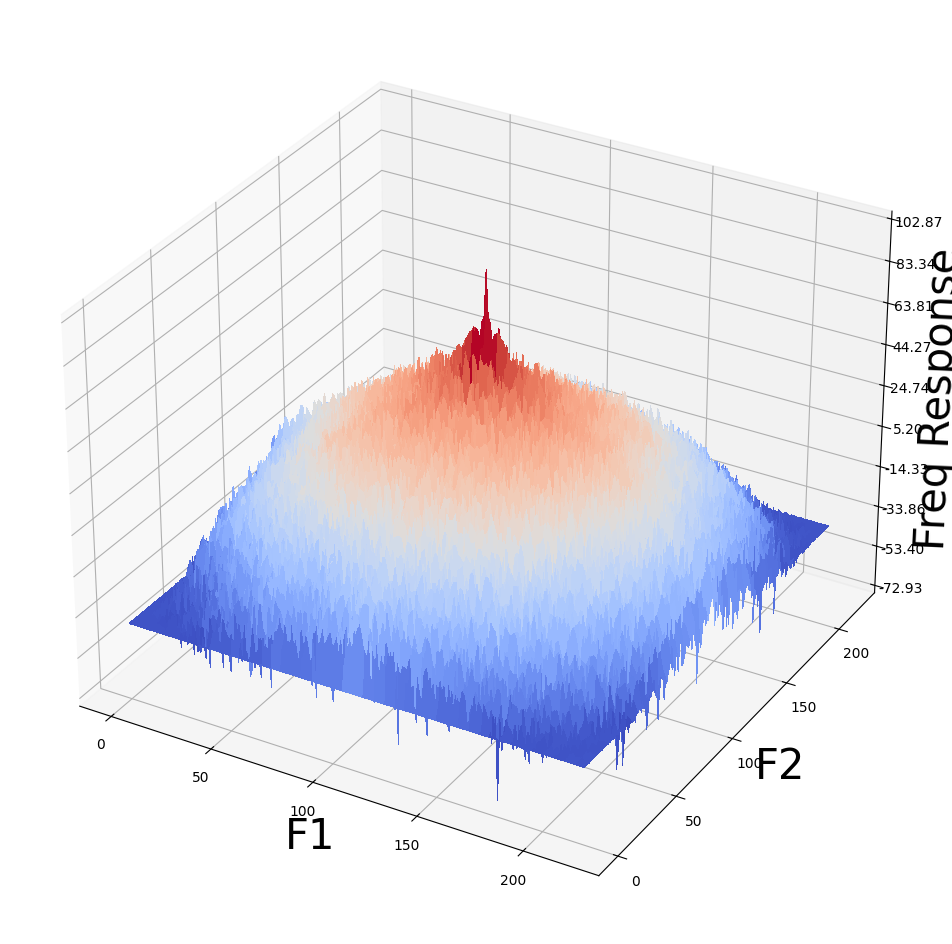

In [54]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
Z = (20*np.log10( 0.01 + fp.fftshift(convolved))).real
plot_3d(X,Y,Z)

- fp.fftshift(freq): Tương tự, dịch chuyển tần số của ảnh trong không gian Fourier để đưa phần trung tâm vào giữa, làm cho các tần số thấp xuất hiện ở giữa và các tần số cao ở các cạnh.
    - 20*np.log10(0.01 + ...): Chuyển đổi phổ tần số của ảnh sang đơn vị decibel (dB).
    - .real: Lấy phần thực của kết quả sau khi dịch chuyển và chuyển đổi sang dB